# Incidence du syndrome grippal

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence du syndrome grippal sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-3.csv"

Pour nous protéger contre une éventuelle disparition ou modification du serveur du Réseau Sentinelles, nous faisons une copie locale de ce jeux de données que nous préservons avec notre analyse. Il est inutile et même risquée de télécharger les données à chaque exécution, car dans le cas d'une panne nous pourrions remplacer nos données par un fichier défectueux. Pour cette raison, nous téléchargeons les données seulement si la copie locale n'existe pas.

In [22]:
data_file = "syndrome-grippal.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [4]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202512          3   59181   50703.0   67659.0     88        75.0   
1     202511          3   60061   52680.0   67442.0     90        79.0   
2     202510          3   60334   53048.0   67620.0     90        79.0   
3     202509          3   84531   74994.0   94068.0    126       112.0   
4     202508          3  136020  124824.0  147216.0    203       186.0   
5     202507          3  208952  195988.0  221916.0    312       293.0   
6     202506          3  273519  258159.0  288879.0    408       385.0   
7     202505          3  334395  318416.0  350374.0    499       475.0   
8     202504          3  350043  332885.0  367201.0    522       496.0   
9     202503          3  252772  238917.0  266627.0    377       356.0   
10    202502          3  257247  242991.0  271503.0    384       363.0   
11    202501          3  231549  214627.0  248471.0    345       320.0   
12    202452          3  201726  185870.0  217582.0    302       278.0   
13    202451          3  201697  187843.0  215551.0    302       281.0   
14    202450          3  136694  126369.0  147019.0    205       190.0   
15    202449          3  108487   99037.0  117937.0    163       149.0   
16    202448          3   87381   78687.0   96075.0    131       118.0   
17    202447          3   76286   67626.0   84946.0    114       101.0   
18    202446          3   56399   49006.0   63792.0     85        74.0   
19    202445          3   47347   40843.0   53851.0     71        61.0   
20    202444          3   36039   30122.0   41956.0     54        45.0   
21    202443          3   46572   39928.0   53216.0     70        60.0   
22    202442          3   67785   60009.0   75561.0    102        90.0   
23    202441          3   79435   71386.0   87484.0    119       107.0   
24    202440          3   84965   76555.0   93375.0    127       114.0   
25    202439          3   91660   82937.0  100383.0    137       124.0   
26    202438          3   91786   82903.0  100669.0    138       125.0   
27    202437          3   56460   49319.0   63601.0     85        74.0   
28    202436          3   33657   27906.0   39408.0     50        41.0   
29    202435          3   27454   22069.0   32839.0     41        33.0   
...      ...        ...     ...       ...       ...    ...         ...   
2078  198521          3   26096   19621.0   32571.0     47        35.0   
2079  198520          3   27896   20885.0   34907.0     51        38.0   
2080  198519          3   43154   32821.0   53487.0     78        59.0   
2081  198518          3   40555   29935.0   51175.0     74        55.0   
2082  198517          3   34053   24366.0   43740.0     62        44.0   
2083  198516          3   50362   36451.0   64273.0     91        66.0   
2084  198515          3   63881   45538.0   82224.0    116        83.0   
2085  198514          3  134545  114400.0  154690.0    244       207.0   
2086  198513          3  197206  176080.0  218332.0    357       319.0   
2087  198512          3  245240  223304.0  267176.0    445       405.0   
2088  198511          3  276205  252399.0  300011.0    501       458.0   
2089  198510          3  353231  326279.0  380183.0    640       591.0   
2090  198509          3  369895  341109.0  398681.0    670       618.0   
2091  198508          3  389886  359529.0  420243.0    707       652.0   
2092  198507          3  471852  432599.0  511105.0    855       784.0   
2093  198506          3  565825  518011.0  613639.0   1026       939.0   
2094  198505          3  637302  592795.0  681809.0   1155      1074.0   
2095  198504          3  424937  390794.0  459080.0    770       708.0   
2096  198503          3  213901  174689.0  253113.0    388       317.0   
2097  198502          3   97586   80949.0  114223.0    177       147.0   
2098  198501          3   85489   65918.0  105060.0    155       120.0   
2099  198452          3   84830   60602.0  109058.0    154       110.0   
2100  198451

Y a-t-il des points manquants dans ce jeux de données ? Oui, la semaine 19 de l'année 1989 n'a pas de valeurs associées.

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

week  indicator inc  inc_low  inc_up inc100  inc100_low  inc100_up  \
1871  198919          3   -      NaN     NaN      -         NaN        NaN   

     geo_insee geo_name  
1871        FR   France

Nous éliminons ce point, ce qui n'a pas d'impact fort sur notre analyse qui est assez simple.

In [6]:
data = raw_data.dropna().copy()
data

week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202512          3   59181   50703.0   67659.0     88        75.0   
1     202511          3   60061   52680.0   67442.0     90        79.0   
2     202510          3   60334   53048.0   67620.0     90        79.0   
3     202509          3   84531   74994.0   94068.0    126       112.0   
4     202508          3  136020  124824.0  147216.0    203       186.0   
5     202507          3  208952  195988.0  221916.0    312       293.0   
6     202506          3  273519  258159.0  288879.0    408       385.0   
7     202505          3  334395  318416.0  350374.0    499       475.0   
8     202504          3  350043  332885.0  367201.0    522       496.0   
9     202503          3  252772  238917.0  266627.0    377       356.0   
10    202502          3  257247  242991.0  271503.0    384       363.0   
11    202501          3  231549  214627.0  248471.0    345       320.0   
12    202452          3  201726  185870.0  217582.0    302       278.0   
13    202451          3  201697  187843.0  215551.0    302       281.0   
14    202450          3  136694  126369.0  147019.0    205       190.0   
15    202449          3  108487   99037.0  117937.0    163       149.0   
16    202448          3   87381   78687.0   96075.0    131       118.0   
17    202447          3   76286   67626.0   84946.0    114       101.0   
18    202446          3   56399   49006.0   63792.0     85        74.0   
19    202445          3   47347   40843.0   53851.0     71        61.0   
20    202444          3   36039   30122.0   41956.0     54        45.0   
21    202443          3   46572   39928.0   53216.0     70        60.0   
22    202442          3   67785   60009.0   75561.0    102        90.0   
23    202441          3   79435   71386.0   87484.0    119       107.0   
24    202440          3   84965   76555.0   93375.0    127       114.0   
25    202439          3   91660   82937.0  100383.0    137       124.0   
26    202438          3   91786   82903.0  100669.0    138       125.0   
27    202437          3   56460   49319.0   63601.0     85        74.0   
28    202436          3   33657   27906.0   39408.0     50        41.0   
29    202435          3   27454   22069.0   32839.0     41        33.0   
...      ...        ...     ...       ...       ...    ...         ...   
2078  198521          3   26096   19621.0   32571.0     47        35.0   
2079  198520          3   27896   20885.0   34907.0     51        38.0   
2080  198519          3   43154   32821.0   53487.0     78        59.0   
2081  198518          3   40555   29935.0   51175.0     74        55.0   
2082  198517          3   34053   24366.0   43740.0     62        44.0   
2083  198516          3   50362   36451.0   64273.0     91        66.0   
2084  198515          3   63881   45538.0   82224.0    116        83.0   
2085  198514          3  134545  114400.0  154690.0    244       207.0   
2086  198513          3  197206  176080.0  218332.0    357       319.0   
2087  198512          3  245240  223304.0  267176.0    445       405.0   
2088  198511          3  276205  252399.0  300011.0    501       458.0   
2089  198510          3  353231  326279.0  380183.0    640       591.0   
2090  198509          3  369895  341109.0  398681.0    670       618.0   
2091  198508          3  389886  359529.0  420243.0    707       652.0   
2092  198507          3  471852  432599.0  511105.0    855       784.0   
2093  198506          3  565825  518011.0  613639.0   1026       939.0   
2094  198505          3  637302  592795.0  681809.0   1155      1074.0   
2095  198504          3  424937  390794.0  459080.0    770       708.0   
2096  198503          3  213901  174689.0  253113.0    388       317.0   
2097  198502          3   97586   80949.0  114223.0    177       147.0   
2098  198501          3   85489   65918.0  105060.0    155       120.0   
2099  198452          3   84830   60602.0  109058.0    154       110.0   
2100  198451

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [11]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [24]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives
entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations
que nous avions supprimées !

In [23]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

1989-05-01/1989-05-07 1989-05-15/1989-05-21


Un premier regard sur les données !

In [25]:
sorted_data['inc'].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

In [16]:
sorted_data['inc'][-200:].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er août de l'année $N$ au
1er août de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er août de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er août.

Comme l'incidence de syndrome grippal est très faible en été, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent an octobre 1984, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1985.

In [17]:
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [18]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

In [19]:
yearly_incidence.plot(style='*')

TypeError: Empty 'DataFrame': no numeric data to plot

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [20]:
yearly_incidence.sort_values()

1999    1214713082934385324913033696810837170752023524...
2023    1325712222758674989283141202139528781399024192...
1998    1386208617993226184251314542323110189132921693...
2000    1478264071499757760033348191754312430285532418...
2024    1528614641191442666331695382474908563218720036...
1986    1695874882261140389302152798622219276053981949...
2007    1773001572217011071786253289451195013920166732...
2002    1899900299043994663802597362540718113202411896...
1996    1946700905188724963659489513123184991624514980...
2008    1965132418933531177110014494769159851351712987...
2019    2048183919621368150632154915734971747409804877...
2001    2159140516905188559029902243741719338272374002...
1987    2247102731155762105879182159982661528665335163...
2014    2270470947401889129146395027932453719794123911...
2020    2337159215931672101022953172489770918505712277...
2012    2409259024213312417846068365140071702114053748...
1992    2464625165420992372238024297460143732674028185...
2013    269663

Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population
  française, sont assez rares: il y en eu trois au cours des 35 dernières années.

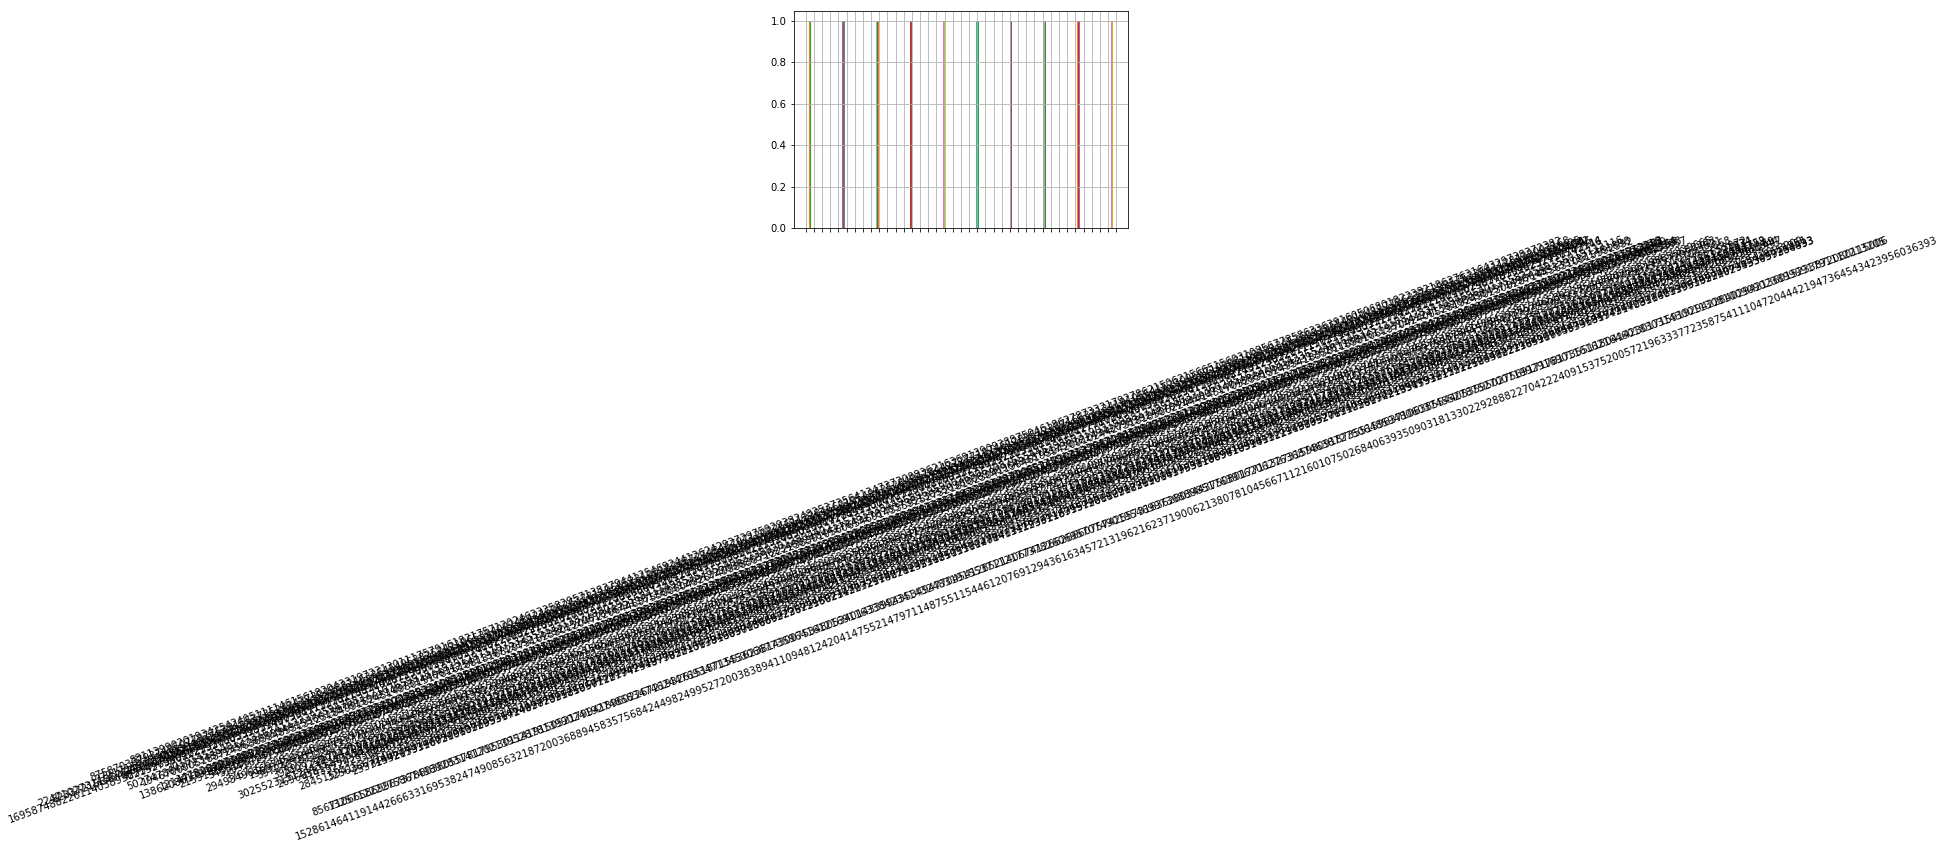

In [21]:
yearly_incidence.hist(xrot=20)